In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
pd.set_option("display.max_columns", 50)

In [2]:
df = pd.read_csv('df_knn.csv')
df

,Unnamed: 0,y_test,pred_knn
0,104,-6.800000,-6.833333
1,524,-6.000000,-5.737631
2,1563,-7.433333,-7.878284
3,1462,-5.700000,-5.433333
4,749,-7.900000,-7.433333
...,...,...,...
477,1198,-5.866667,-6.573990
478,475,-6.333333,-6.666667
479,351,-6.166667,-6.151820
480,704,-8.366667,-7.935319


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.862000,0.862000,0.389000,0.287000,None,0.059000,0.949000,0.078000,1.010000


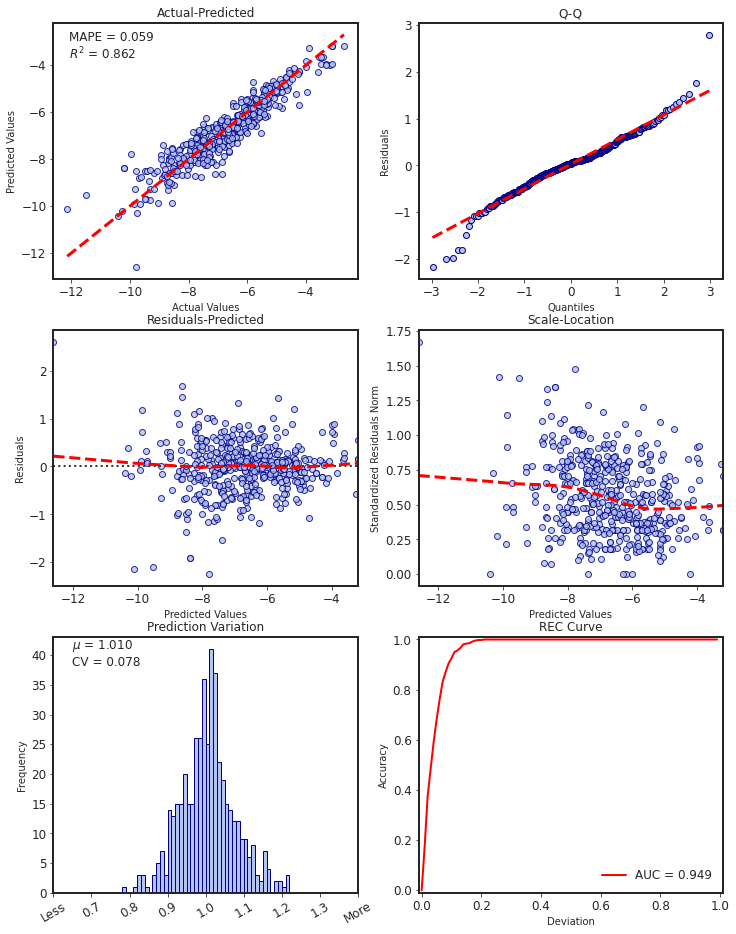

AttributeError: 'NoneType' object has no attribute 'savefig'

In [3]:
from slickml.metrics import RegressionMetrics
reg_metrics = RegressionMetrics(df['y_test'], df['pred_knn'])

reg_metrics.plot(save_path='KNN_REC.tiff', dpi=600)


In [4]:
accuracy = reg_metrics.accuracy_
deviation = reg_metrics.deviation_
df_knn = pd.DataFrame({'Accuracy_knn': accuracy, 'Deviation': deviation})
df_knn.to_csv('df_knn_rec_stats.csv')

In [ ]:
# RF

In [5]:
df = pd.read_csv('df_rf.csv')
df

,Unnamed: 0,y_test,pred_rf
0,104,-6.800000,-7.212500
1,524,-6.000000,-5.591065
2,1563,-7.433333,-8.077444
3,1462,-5.700000,-5.439593
4,749,-7.900000,-7.354444
...,...,...,...
477,1198,-5.866667,-6.454148
478,475,-6.333333,-6.714812
479,351,-6.166667,-5.917315
480,704,-8.366667,-8.045000


,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.860000,0.861000,0.391000,0.289000,None,0.058000,0.949000,0.077000,1.010000


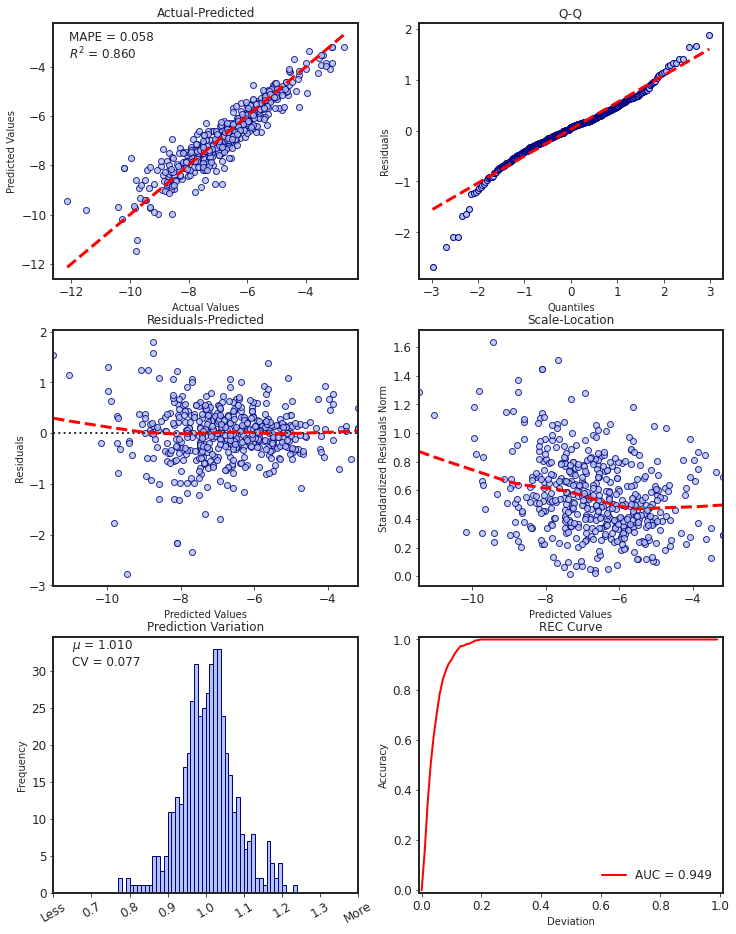

In [6]:
reg_metrics = RegressionMetrics(df['y_test'], df['pred_rf'])
reg_metrics.plot()
#reg_metrics.plot(save_path='RF_REC.tiff')

In [7]:
accuracy = reg_metrics.accuracy_
deviation = reg_metrics.deviation_
df_rf = pd.DataFrame({'Accuracy_rf': accuracy, 'Deviation': deviation})
df_rf.to_csv('df_rf_rec_stats.csv')

In [ ]:
# SVM

In [8]:
df = pd.read_csv('df_svm.csv')
df

,Unnamed: 0,y_test,pred_svm
0,104,-6.800000,-7.062732
1,524,-6.000000,-5.777772
2,1563,-7.433333,-7.901170
3,1462,-5.700000,-5.686807
4,749,-7.900000,-7.401527
...,...,...,...
477,1198,-5.866667,-6.262539
478,475,-6.333333,-5.888451
479,351,-6.166667,-6.151450
480,704,-8.366667,-8.472278


,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.866000,0.867000,0.384000,0.277000,None,0.057000,0.950000,0.075000,1.003000


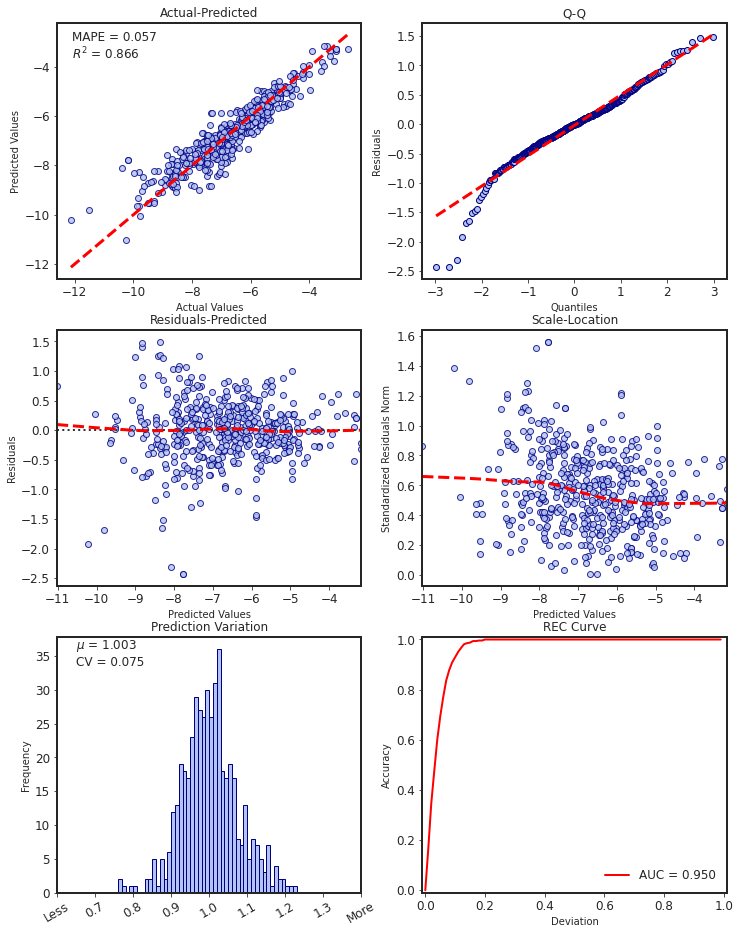

In [9]:
reg_metrics = RegressionMetrics(df['y_test'], df['pred_svm'])
reg_metrics.plot()
#reg_metrics.plot(save_path='SVM_REC.tiff')

In [10]:
accuracy = reg_metrics.accuracy_
deviation = reg_metrics.deviation_
df_svm = pd.DataFrame({'Accuracy_svm': accuracy, 'Deviation': deviation})
df_svm.to_csv('df_svm_rec_stats.csv')

In [7]:
#Ensemble

In [11]:
df = pd.read_csv('df_ensemble.csv')
df

,Unnamed: 0,y_test,pred_ensemble
0,104,-6.800000,-7.031096
1,524,-6.000000,-5.691708
2,1563,-7.433333,-7.877748
3,1462,-5.700000,-5.526650
4,749,-7.900000,-7.389095
...,...,...,...
477,1198,-5.866667,-6.446590
478,475,-6.333333,-6.425807
479,351,-6.166667,-6.058343
480,704,-8.366667,-8.183273


,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.882000,0.882000,0.363000,0.245000,None,0.054000,0.952000,0.071000,1.007000


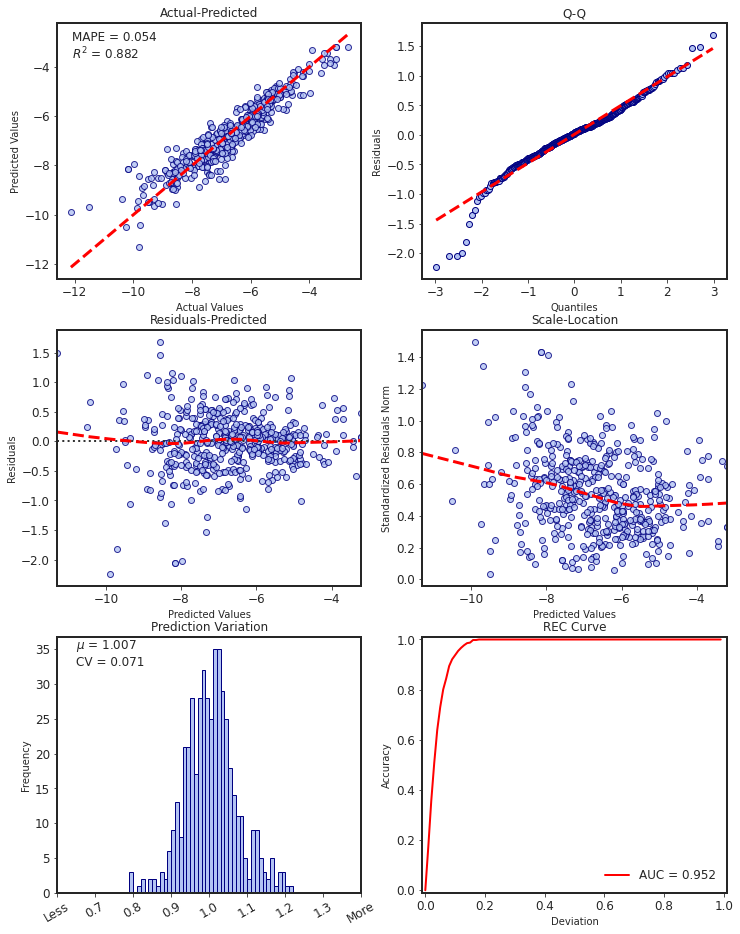

In [12]:
from slickml.metrics import RegressionMetrics
reg_metrics = RegressionMetrics(df['y_test'], df['pred_ensemble'])
reg_metrics.plot()
#reg_metrics.plot(save_path='Ensemble_REC.tiff')

In [13]:
accuracy = reg_metrics.accuracy_
deviation = reg_metrics.deviation_
df_ensemble = pd.DataFrame({'Accuracy_ensemble': accuracy, 'Deviation': deviation})
df_ensemble.to_csv('df_ensemble_rec_stats.csv')

In [15]:
df_knn_rf = pd.merge(df_knn, df_rf, how = 'inner', on='Deviation')
df_knn_rf

,Accuracy_knn,Deviation,Accuracy_rf
0,0.000000,0.00,0.000000
1,0.174274,0.01,0.153527
2,0.375519,0.02,0.346473
3,0.483402,0.03,0.500000
4,0.589212,0.04,0.612033
...,...,...,...
95,1.000000,0.95,1.000000
96,1.000000,0.96,1.000000
97,1.000000,0.97,1.000000
98,1.000000,0.98,1.000000


In [16]:
df_svm_ensemble = pd.merge(df_svm, df_ensemble, how = 'inner', on='Deviation')
df_svm_ensemble

,Accuracy_svm,Deviation,Accuracy_ensemble
0,0.000000,0.00,0.000000
1,0.165975,0.01,0.172199
2,0.346473,0.02,0.356846
3,0.475104,0.03,0.508299
4,0.599585,0.04,0.639004
...,...,...,...
95,1.000000,0.95,1.000000
96,1.000000,0.96,1.000000
97,1.000000,0.97,1.000000
98,1.000000,0.98,1.000000


In [17]:
df_merged = pd.merge(df_knn_rf, df_svm_ensemble, how = 'inner', on='Deviation')
df_merged

,Accuracy_knn,Deviation,Accuracy_rf,Accuracy_svm,Accuracy_ensemble
0,0.000000,0.00,0.000000,0.000000,0.000000
1,0.174274,0.01,0.153527,0.165975,0.172199
2,0.375519,0.02,0.346473,0.346473,0.356846
3,0.483402,0.03,0.500000,0.475104,0.508299
4,0.589212,0.04,0.612033,0.599585,0.639004
...,...,...,...,...,...
95,1.000000,0.95,1.000000,1.000000,1.000000
96,1.000000,0.96,1.000000,1.000000,1.000000
97,1.000000,0.97,1.000000,1.000000,1.000000
98,1.000000,0.98,1.000000,1.000000,1.000000


In [29]:
df_merged.to_csv('Accuracy_deviation.csv')